Nama : Sultan Muhamad Taufik Mamur <br>
NIM : 211351142<br>
Kelas : PAGI B

# import Dataset

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sultanmtm97","key":"24436c4df1f7871132f53aede46a6553"}'}

pertama kita import dulu file kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d arshid/iris-flower-dataset

  0% 0.00/0.99k [00:00<?, ?B/s]
100% 0.99k/0.99k [00:00<00:00, 1.27MB/s]


masukan link dataset

In [4]:
!mkdir iris-flower-dataset
!unzip iris-flower-dataset.zip -d iris-flower-dataset
!ls iris-flower-dataset

Archive:  iris-flower-dataset.zip
  inflating: iris-flower-dataset/IRIS.csv  
IRIS.csv


# import library yang digunakan

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

masukan liblary yang kita gunakan dalam codingan kita

# Data Discovery

In [6]:
df = pd.read_csv('/content/iris-flower-dataset/IRIS.csv')

salin jalur csv agar data bisa dipakai

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


lihat info data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

melihat apakah data ada yang bermasalah

In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# EDA

<Axes: >

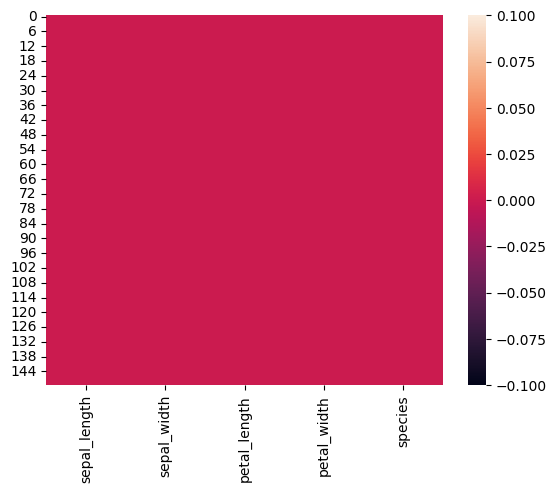

In [11]:
sns.heatmap(df.isnull())

<ipython-input-12-ee535b2cc5be>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

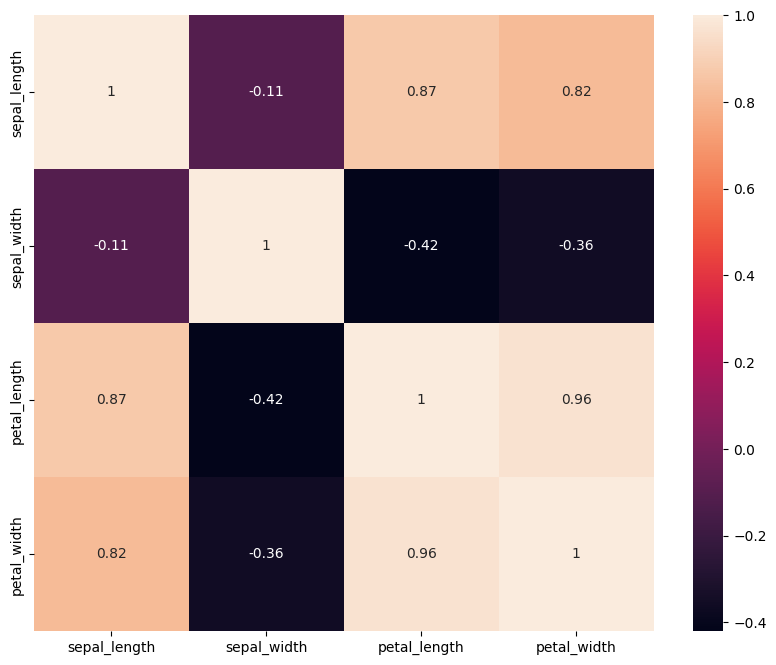

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

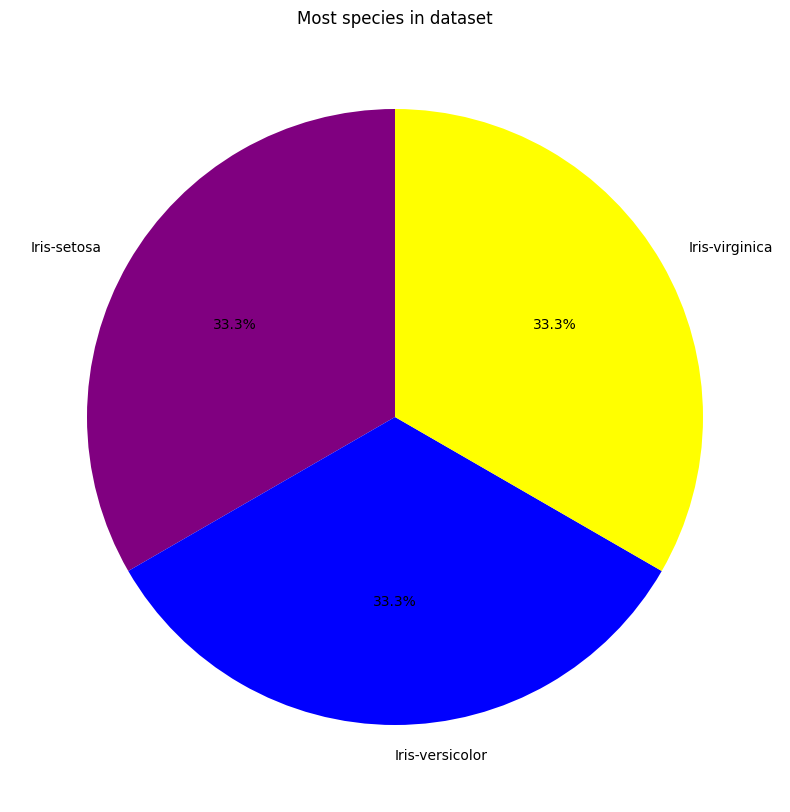

In [13]:
x=df.species.value_counts()
plt.figure(figsize=(12, 10))
plt.pie(x, labels=x.index, autopct='%1.1f%%', startangle=90, colors=['purple', 'blue', 'yellow'])
plt.title('Most species in dataset')
plt.show()

melihat banyak data species

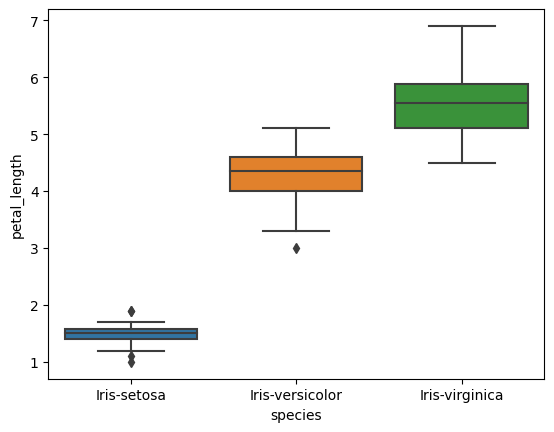

In [14]:
sns.boxplot(x="species",y="petal_length",data=df)
plt.show()

melihat petal bunga apa yang paling panjang

<Axes: xlabel='sepal_length', ylabel='Count'>

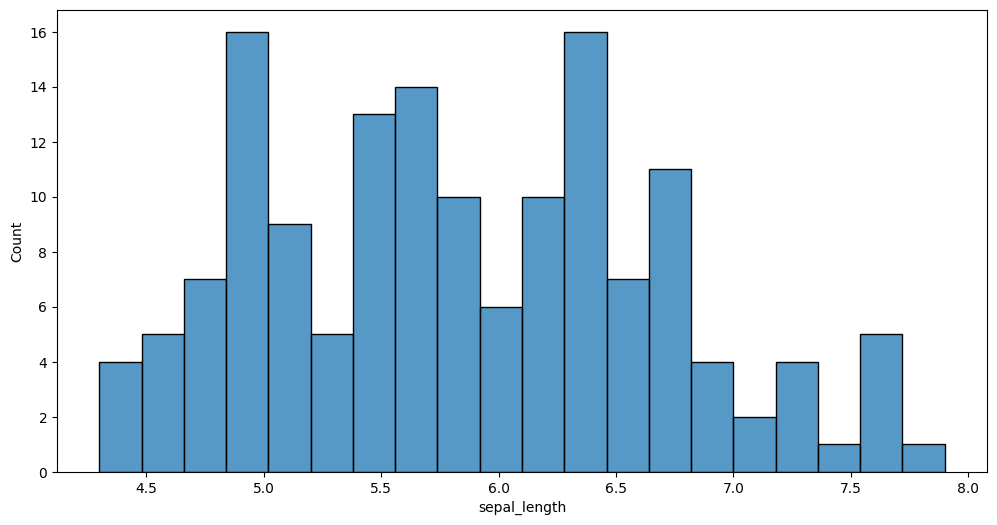

In [15]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x=df.sepal_length,bins=20)

data panjang sepal dalam bentuk grafik

<Axes: xlabel='petal_width', ylabel='Count'>

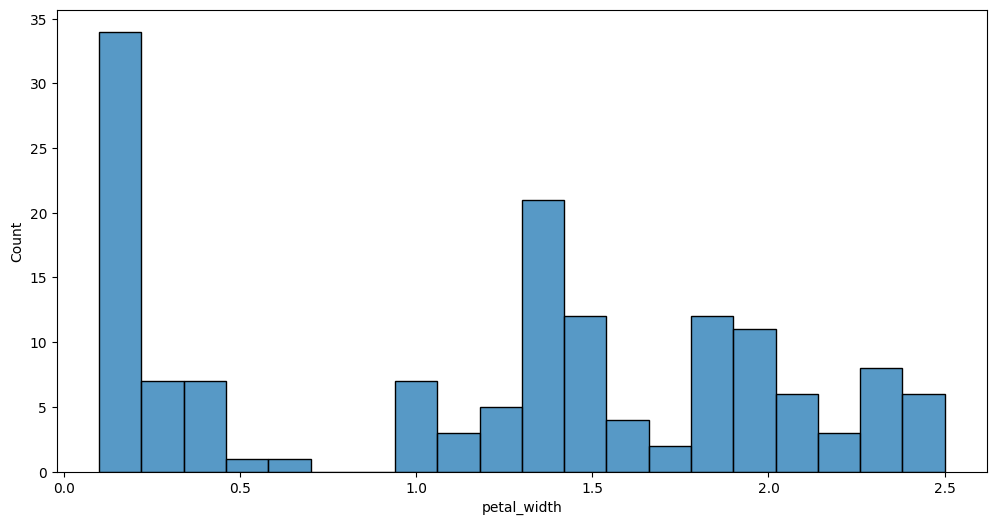

In [16]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x=df.petal_width,bins=20)

data lebar sepal dalam bentuk grafik

# Preprocessing

disini kita akan menghapus(drop) data species

In [17]:
x = df.drop(['species'], axis = 1)

In [18]:
print (x)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


data species berhasil dihapus

kita cari elbownya

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

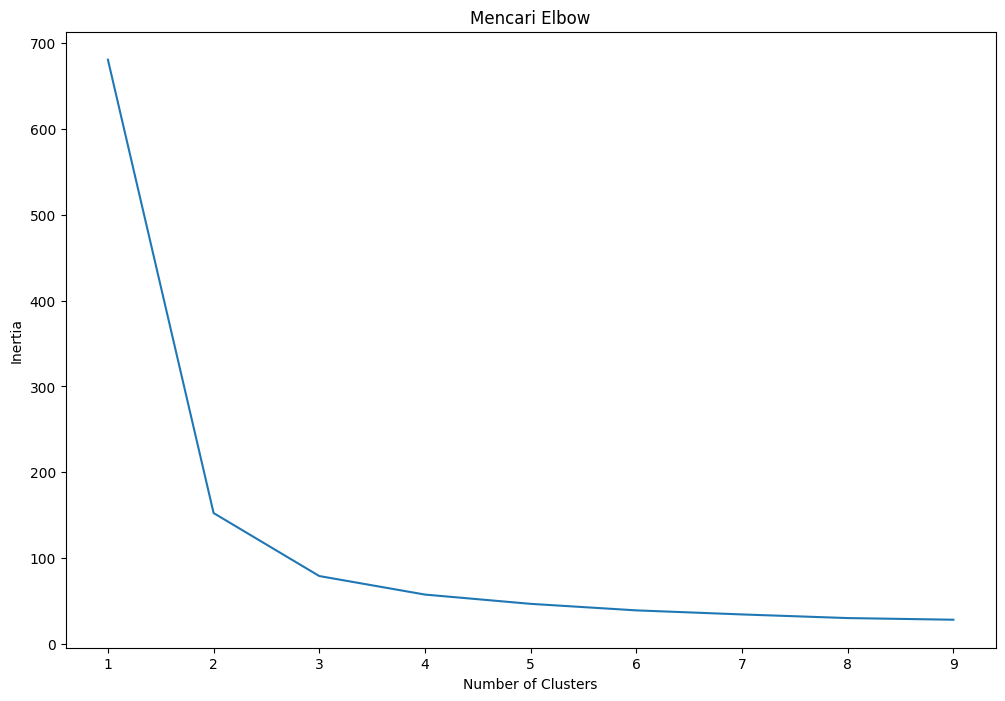

In [19]:
clusters = []
for i in range(1, 10):
    km = KMeans(n_clusters=i).fit(x)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 10)), y=clusters, ax=ax)
ax.set_title('Mencari Elbow')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Inertia')

plt.show()

disini kita telah menemukan elbownya yaitu 3

# modeling

disini kita akan mengcluster data atau mengelompokan data

In [20]:
n_clust = 3
kmean = KMeans(n_clusters=n_clust).fit(x)
x['Labels'] = kmean.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


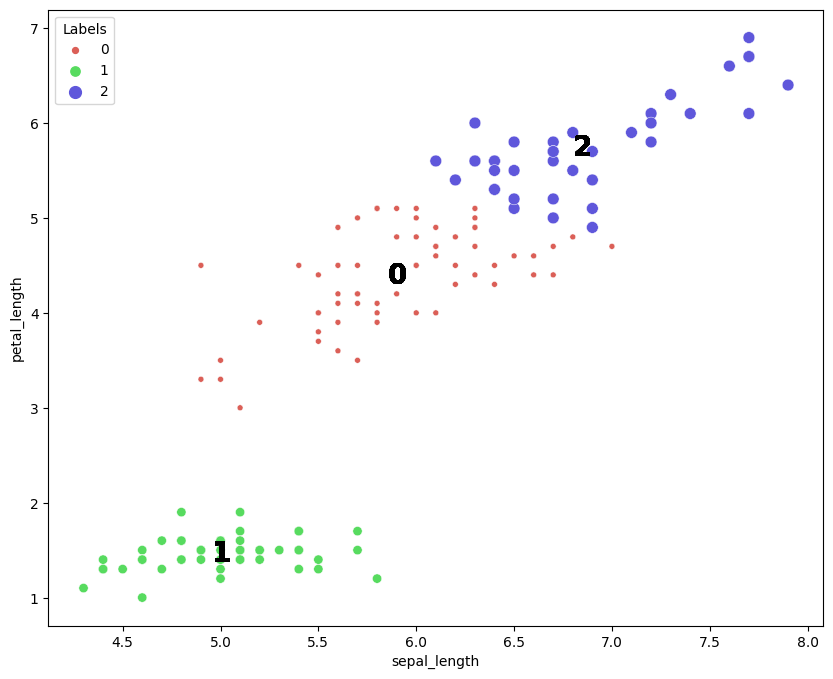

In [21]:
plt.figure(figsize=(10, 8))

sns.scatterplot(x='sepal_length', y='petal_length', hue='Labels', size='Labels', markers=True, palette=sns.color_palette('hls', n_colors=n_clust), data=x)

for label in x['Labels']:
    plt.annotate(label,
                 (x[x['Labels'] == label]['sepal_length'].mean(),
                  x[x['Labels'] == label]['petal_length'].mean()),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='black')

plt.show()

Data sudah berhasil kita clustering/kelompokkan.

kita lihat data

In [22]:
print (x)

     sepal_length  sepal_width  petal_length  petal_width  Labels
0             5.1          3.5           1.4          0.2       1
1             4.9          3.0           1.4          0.2       1
2             4.7          3.2           1.3          0.2       1
3             4.6          3.1           1.5          0.2       1
4             5.0          3.6           1.4          0.2       1
..            ...          ...           ...          ...     ...
145           6.7          3.0           5.2          2.3       2
146           6.3          2.5           5.0          1.9       0
147           6.5          3.0           5.2          2.0       2
148           6.2          3.4           5.4          2.3       2
149           5.9          3.0           5.1          1.8       0

[150 rows x 5 columns]


In [24]:
x.to_excel("Output_Cluster.xlsx")

#Exporting dengan Pickle

In [23]:
import pickle

with open("model.pkl", "wb") as mod:
    pickle.dump(kmean, mod)

file pickle berhasil terexport